In [1]:
pip install pandas scikit-learn nltk matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rafae\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
# Leitura dos dados
df = pd.read_csv("artigos_wit.csv")

df.head()

edicao            categoria  \
0  2025: Anais do XIX Women in Information Techno...  Artigos de Pesquisa   
1  2025: Anais do XIX Women in Information Techno...  Artigos de Pesquisa   
2  2025: Anais do XIX Women in Information Techno...  Artigos de Pesquisa   
3  2025: Anais do XIX Women in Information Techno...  Artigos de Pesquisa   
4  2025: Anais do XIX Women in Information Techno...  Artigos de Pesquisa   

                                              titulo  \
0  Inclusão de Mulheres na Área de Cibersegurança...   
1  Presença de mulheres na Engenharia: Um estudo ...   
2  Interseccionalidade e Tecnologia: Um Mapeament...   
3  Investigando o Ingresso e a Permanência Femini...   
4  Conectando Mulheres à STEM: Um Panorama dos Ev...   

                                             autores  \
0  Maristela Holanda (UnB); Adrielly Lima (UnB); ...   
1  Marinêz V. de M. Werneck Magalhães (CEFET-MG);...   
2  Karolyne Rodrigues (IFCE); Rayane Silva Duarte...   
3  Lívia Evily de A. Rocha (UESB); Ana Carolina X...   
4  Ana Clara Ribeiro Rodrigues da Cunha (IFTM); L...   

                                            abstract  \
0  A baixa participação profissional das mulheres...   
1  Este estudo analisou a representatividade de m...   
2  O presente estudo consiste em um Mapeamento Si...   
3  Este artigo analisa a participação feminina no...   
4  A baixa representatividade feminina na Tecnolo...   

                                                 url  
0  https://sol.sbc.org.br/index.php/wit/article/v...  
1  https://sol.sbc.org.br/index.php/wit/article/v...  
2  https://sol.sbc.org.br/index.php/wit/article/v...  
3  https://sol.sbc.org.br/index.php/wit/article/v...  
4  https://sol.sbc.org.br/index.php/wit/article/v...

In [4]:
# (2) Extração do ANO da coluna "edicao"
def extrair_ano(texto):
    if pd.isnull(texto):
        return None
    match = re.search(r'(19|20)\d{2}', str(texto))
    return int(match.group()) if match else None

df["ano"] = df["edicao"].apply(extrair_ano)

print("\nAnos encontrados:")
print(df["ano"].value_counts().sort_index())


Anos encontrados:
ano
2016    26
2017    29
2018    28
2019    33
2020    42
2021    48
2022    30
2023    52
2024    51
2025    82
Name: count, dtype: int64


In [5]:
df.head()

edicao            categoria  \
0  2025: Anais do XIX Women in Information Techno...  Artigos de Pesquisa   
1  2025: Anais do XIX Women in Information Techno...  Artigos de Pesquisa   
2  2025: Anais do XIX Women in Information Techno...  Artigos de Pesquisa   
3  2025: Anais do XIX Women in Information Techno...  Artigos de Pesquisa   
4  2025: Anais do XIX Women in Information Techno...  Artigos de Pesquisa   

                                              titulo  \
0  Inclusão de Mulheres na Área de Cibersegurança...   
1  Presença de mulheres na Engenharia: Um estudo ...   
2  Interseccionalidade e Tecnologia: Um Mapeament...   
3  Investigando o Ingresso e a Permanência Femini...   
4  Conectando Mulheres à STEM: Um Panorama dos Ev...   

                                             autores  \
0  Maristela Holanda (UnB); Adrielly Lima (UnB); ...   
1  Marinêz V. de M. Werneck Magalhães (CEFET-MG);...   
2  Karolyne Rodrigues (IFCE); Rayane Silva Duarte...   
3  Lívia Evily de A. Rocha (UESB); Ana Carolina X...   
4  Ana Clara Ribeiro Rodrigues da Cunha (IFTM); L...   

                                            abstract  \
0  A baixa participação profissional das mulheres...   
1  Este estudo analisou a representatividade de m...   
2  O presente estudo consiste em um Mapeamento Si...   
3  Este artigo analisa a participação feminina no...   
4  A baixa representatividade feminina na Tecnolo...   

                                                 url   ano  
0  https://sol.sbc.org.br/index.php/wit/article/v...  2025  
1  https://sol.sbc.org.br/index.php/wit/article/v...  2025  
2  https://sol.sbc.org.br/index.php/wit/article/v...  2025  
3  https://sol.sbc.org.br/index.php/wit/article/v...  2025  
4  https://sol.sbc.org.br/index.php/wit/article/v...  2025

In [6]:
df.isna().sum()

edicao       0
categoria    0
titulo       0
autores      3
abstract     0
url          0
ano          0
dtype: int64

In [16]:
df[df["autores"].isna()]

edicao categoria  \
305  2019: Anais do XIII Women in Information Techn...  Abertura   
306  2019: Anais do XIII Women in Information Techn...  Abertura   
395   2016: Anais do X Women in Information Technology  Abertura   

                                               titulo autores  \
305  Abertura do XIII Women in Information Technology     NaN   
306                    Mensagem da Coordenação do WIT     NaN   
395     Abertura do X Women in Information Technology     NaN   

                                              abstract  \
305  Mensagem da Coordenação do XXXIX Congresso da ...   
306  Mensagem da Coordenação do XIII Women in Infor...   
395  Abertura do X Women in Information Technology ...   

                                                   url   ano  
305  https://sol.sbc.org.br/index.php/wit/article/v...  2019  
306  https://sol.sbc.org.br/index.php/wit/article/v...  2019  
395  https://sol.sbc.org.br/index.php/wit/article/v...  2016

In [7]:
df_filtrado = df[df["categoria"] != "Abertura"].copy()

print("Categorias restantes:")
print(df_filtrado["categoria"].value_counts())

Categorias restantes:
categoria
Artigos Curtos            128
Artigos Completos         126
Artigos                    81
Relatos de Experiência     47
Artigos de Pesquisa        31
Ferramentas                 4
Name: count, dtype: int64


In [8]:
tabela_categoria_ano = (
    df_filtrado
    .groupby(["ano", "categoria"])
    .size()
    .reset_index(name="quantidade_artigos")
    .sort_values(["ano", "quantidade_artigos"], ascending=[True, False])
)

print(tabela_categoria_ano)

     ano               categoria  quantidade_artigos
0   2016                 Artigos                  25
1   2017                 Artigos                  28
2   2018                 Artigos                  28
4   2019          Artigos Curtos                  21
3   2019       Artigos Completos                  10
6   2020          Artigos Curtos                  26
5   2020       Artigos Completos                  16
7   2021       Artigos Completos                  26
8   2021          Artigos Curtos                  22
9   2022       Artigos Completos                  16
10  2022          Artigos Curtos                  14
11  2023       Artigos Completos                  30
12  2023          Artigos Curtos                  22
13  2024       Artigos Completos                  28
14  2024          Artigos Curtos                  23
17  2025  Relatos de Experiência                  47
15  2025     Artigos de Pesquisa                  31
16  2025             Ferramentas              

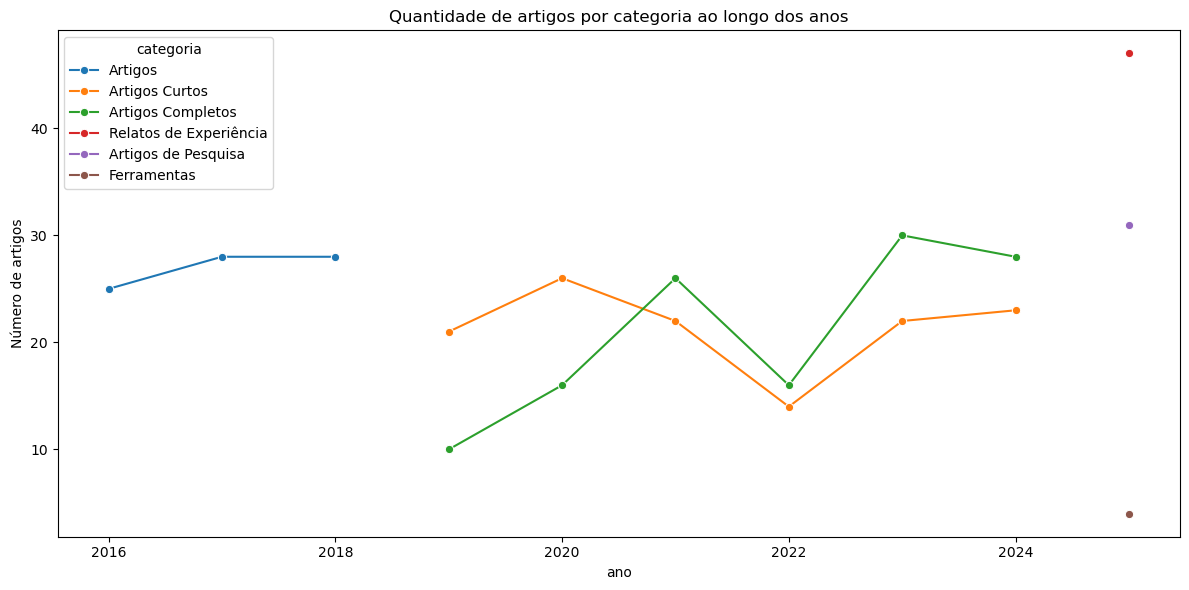

In [18]:
plt.figure(figsize=(12,6))
sns.lineplot(
    data=tabela_categoria_ano,
    x="ano",
    y="quantidade_artigos",
    hue="categoria",
    marker="o"
)
plt.title("Quantidade de artigos por categoria ao longo dos anos")
plt.ylabel("Número de artigos")
plt.tight_layout()
plt.savefig("lineplot_artigos_por_categoria_ano.png", dpi=300, bbox_inches="tight")
plt.show()

In [20]:
artigos_por_ano = (
    df.groupby("ano")
      .size()
      .reset_index(name="quantidade_artigos")
      .sort_values("ano")
)

print(artigos_por_ano)

    ano  quantidade_artigos
0  2016                  26
1  2017                  29
2  2018                  28
3  2019                  33
4  2020                  42
5  2021                  48
6  2022                  30
7  2023                  52
8  2024                  51
9  2025                  82


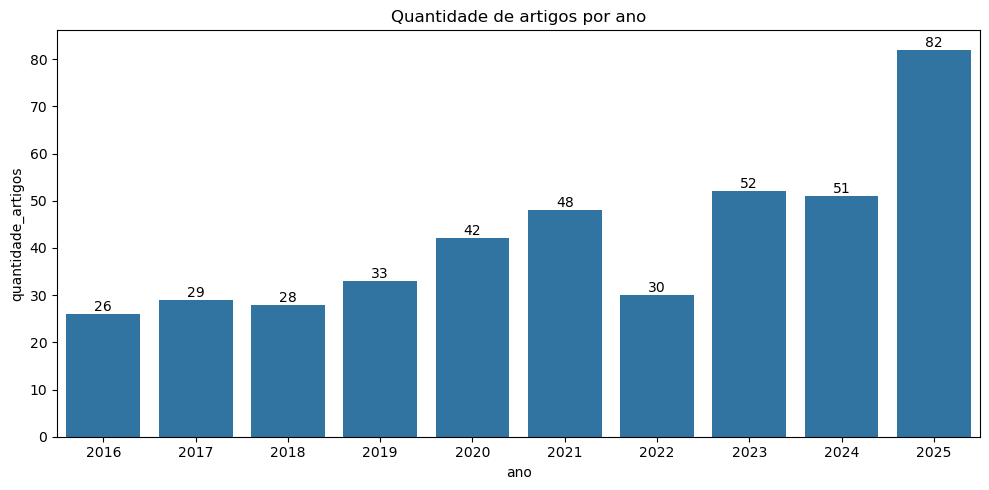

In [21]:
plt.figure(figsize=(10,5))
ax = sns.barplot(data=artigos_por_ano, x="ano", y="quantidade_artigos")

for p in ax.patches:
    ax.annotate(
        int(p.get_height()),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom'
    )

plt.title("Quantidade de artigos por ano")
plt.tight_layout()
plt.savefig("artigos_por_ano.png", dpi=300, bbox_inches="tight")
plt.show()

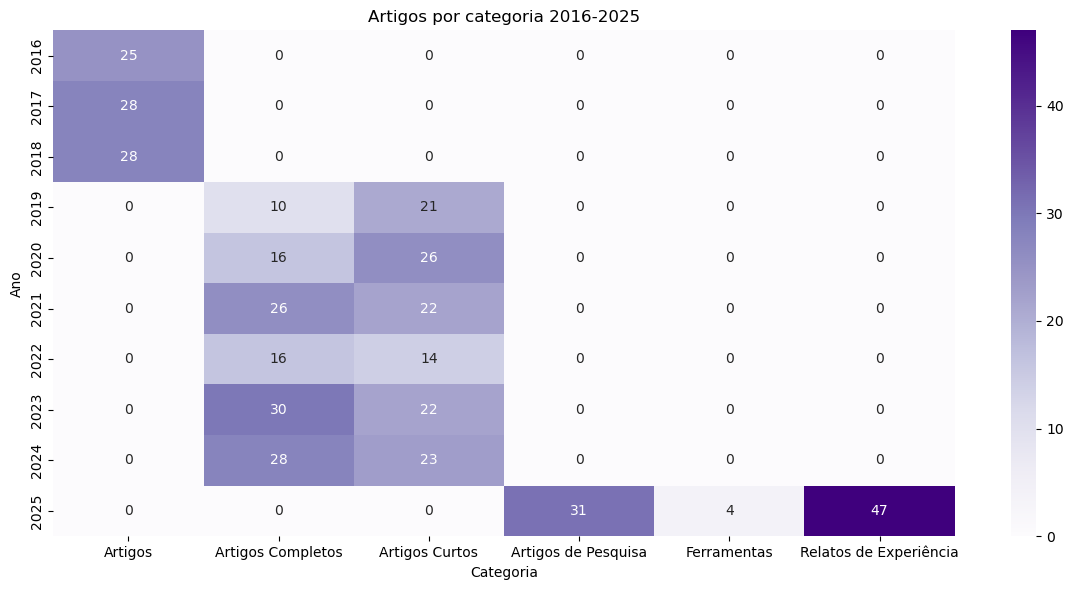

In [17]:
plt.figure(figsize=(12,6))
sns.heatmap(pivot_categoria_ano, annot=True, fmt="d", cmap="Purples")
plt.title("Artigos por categoria 2016-2025")
plt.ylabel("Ano")
plt.xlabel("Categoria")
plt.tight_layout()

plt.savefig("heatmap_artigos_por_categoria_ano.png", dpi=300, bbox_inches="tight")
plt.show()

In [30]:
#Adicionando coluna ID_ARTIGO
df_filtrado["id_artigo"] = range(1, len(df_filtrado) + 1)
df_filtrado

edicao            categoria  \
0    2025: Anais do XIX Women in Information Techno...  Artigos de Pesquisa   
1    2025: Anais do XIX Women in Information Techno...  Artigos de Pesquisa   
2    2025: Anais do XIX Women in Information Techno...  Artigos de Pesquisa   
3    2025: Anais do XIX Women in Information Techno...  Artigos de Pesquisa   
4    2025: Anais do XIX Women in Information Techno...  Artigos de Pesquisa   
..                                                 ...                  ...   
416   2016: Anais do X Women in Information Technology              Artigos   
417   2016: Anais do X Women in Information Technology              Artigos   
418   2016: Anais do X Women in Information Technology              Artigos   
419   2016: Anais do X Women in Information Technology              Artigos   
420   2016: Anais do X Women in Information Technology              Artigos   

                                                titulo  \
0    Inclusão de Mulheres na Área de Cibersegurança...   
1    Presença de mulheres na Engenharia: Um estudo ...   
2    Interseccionalidade e Tecnologia: Um Mapeament...   
3    Investigando o Ingresso e a Permanência Femini...   
4    Conectando Mulheres à STEM: Um Panorama dos Ev...   
..                                                 ...   
416  Cunhantã Digital: programa de incentivo à part...   
417  Computasseia: destacando a participação femini...   
418    Ciência da Computação também é coisa de menina!   
419  Análise da Influência de Grupos de Inclusão de...   
420  Ações para Incentivar Meninas do Ensino Médio ...   

                                               autores  \
0    Maristela Holanda (UnB); Adrielly Lima (UnB); ...   
1    Marinêz V. de M. Werneck Magalhães (CEFET-MG);...   
2    Karolyne Rodrigues (IFCE); Rayane Silva Duarte...   
3    Lívia Evily de A. Rocha (UESB); Ana Carolina X...   
4    Ana Clara Ribeiro Rodrigues da Cunha (IFTM); L...   
..                                                 ...   
416  Tanara Lauschner (UFAM); Rosiane de Freitas (U...   
417  Karen da Silva Figueiredo (UFMT); Jean Carlos ...   
418  Karina Mochetti (UFF); Luciana Salgado (UFF); ...   
419  Mariana Prudêncio (UTFPR); Ana Paula Chaves (U...   
420  Idalmis Millián Sardinã (UFRN); Cristiano Maci...   

                                              abstract  \
0    A baixa participação profissional das mulheres...   
1    Este estudo analisou a representatividade de m...   
2    O presente estudo consiste em um Mapeamento Si...   
3    Este artigo analisa a participação feminina no...   
4    A baixa representatividade feminina na Tecnolo...   
..                                                 ...   
416  Este artigo apresenta o Programa Cunhantã Digi...   
417  O presente trabalho apresenta um jogo de carta...   
418  A participação de mulheres nas áreas de Comput...   
419  Pesquisas mostram que a participação de mulher...   
420  Estudos realizados apontam que existe um défic...   

                                                   url   ano  id_artigo  
0    https://sol.sbc.org.br/index.php/wit/article/v...  2025          1  
1    https://sol.sbc.org.br/index.php/wit/article/v...  2025          2  
2    https://sol.sbc.org.br/index.php/wit/article/v...  2025          3  
3    https://sol.sbc.org.br/index.php/wit/article/v...  2025          4  
4    https://sol.sbc.org.br/index.php/wit/article/v...  2025          5  
..                                                 ...   ...        ...  
416  https://sol.sbc.org.br/index.php/wit/article/v...  2016        413  
417  https://sol.sbc.org.br/index.php/wit/article/v...  2016        414  
418  https://sol.sbc.org.br/index.php/wit/article/v...  2016        415  
419  https://sol.sbc.org.br/index.php/wit/article/v...  2016        416  
420  https://sol.sbc.org.br/index.php/wit/article/v...  2016        417  

[417 rows x 8 columns]

In [34]:
!pip install spacy

  Using cached spacy_legacy-3.0.12-py2.py3-none-any.whl.metadata (2.8 kB)
  Using cached spacy_loggers-1.0.5-py3-none-any.whl.metadata (23 kB)
  Using cached wasabi-1.1.3-py3-none-any.whl.metadata (28 kB)
  Using cached catalogue-2.0.10-py3-none-any.whl.metadata (14 kB)
  Using cached confection-0.1.5-py3-none-any.whl.metadata (19 kB)
   ---------------------------------------- 0.0/14.2 MB ? eta -:--:--
   ------ --------------------------------- 2.4/14.2 MB 14.8 MB/s eta 0:00:01
   ----------------- ---------------------- 6.3/14.2 MB 16.5 MB/s eta 0:00:01
   ---------------------------- ----------- 10.0/14.2 MB 16.6 MB/s eta 0:00:01
   -------------------------------------- - 13.6/14.2 MB 16.3 MB/s eta 0:00:01
   ---------------------------------------- 14.2/14.2 MB 14.8 MB/s eta 0:00:00
Using cached catalogue-2.0.10-py3-none-any.whl (17 kB)
Using cached spacy_legacy-3.0.12-py2.py3-none-any.whl (29 kB)
Using cached spacy_loggers-1.0.5-py3-none-any.whl (22 kB)
   ----------------------

In [35]:
!python -m spacy download pt_core_news_sm

     ---------------------------------------- 0.0/13.0 MB ? eta -:--:--
     ------ --------------------------------- 2.1/13.0 MB 15.3 MB/s eta 0:00:01
     ------------------ --------------------- 6.0/13.0 MB 17.1 MB/s eta 0:00:01
     ----------------------------- ---------- 9.4/13.0 MB 17.2 MB/s eta 0:00:01
     ------------------------------- ------- 10.5/13.0 MB 17.3 MB/s eta 0:00:01
     --------------------------------------  12.8/13.0 MB 13.2 MB/s eta 0:00:01
     --------------------------------------- 13.0/13.0 MB 12.6 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')


In [42]:
#Importando bibliotecas básicas para pré-processamento
import re
import time
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from unicodedata import normalize
# from enelvo.normaliser import Normaliser
import spacy


nlp = spacy.load('pt_core_news_sm')
nltk.download('stopwords')
nltk.download('punkt_tab')

stop_words = set(stopwords.words('portuguese'))

#Normalizador Enelvo
# normalizador = Normaliser(tokenizer='readable', #capitalize_inis=True, 
#                           capitalize_pns=True, capitalize_acs=True, 
#                           sanitize=True)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rafae\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\rafae\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


In [66]:
# Pré-processamento - TÍTULO

#Contabilizando o tempo de execução - Início
start_time = time.time()

#Definição de stopwords
stop_words_mine = []

#Pré-Processamento do Título
map_titulo = {}
dic_titulo = {'id_artigo': [], 'titulo_pre_processado': []}

for line, column in df_filtrado.iterrows():
    
    id_artigo = column['id_artigo']
    titulo = column['titulo']
    corpus = []

    if titulo != None:

        #Aplicando normalizador Enelvo
        # text = normalizador.normalise(titulo)

        # #Remoção de Nomes Próprios
        # text = remover_nomes(text)

        #Remoção de acentuação
        text = normalize('NFKD', titulo).encode('ASCII','ignore').decode('ASCII')
        
        #Remoção de caracteres indesejados
        text = re.sub(r'[0-9]', ' ', text)
        text = re.sub(r'\\n', ' ', text)
        text = re.sub(r'\[|\]|\(|\)|:|;|\/|\.|-|,', ' ', text)
        text = re.sub(r"'", '', text)
        text = re.sub(r'"', '', text)

        #Removendo espaços em branco extras
        text = ' '.join(text.split())

        #Descapitalização
        text = text.lower()

        #Lematização (Spacy)
        # doc = nlp(text)  #processa o texto com o modelo do idioma
        # lemmatized_text = [token.lemma_ for token in doc if token.pos_ == 'NOUN'] #Lista apenas os substantivos do texto, na forma base (lema)
        # print(lemmatized_text)
      
        #Tokenização, Lematização - Spacy
        doc = nlp(text)
        tokens = [token.lemma_ for token in doc if token.is_alpha and not token.is_stop and len(token) > 2]

        #Remoção de stopwords: filtra apenas palavras, remove stopwords e palavras curtas
        tokens = [token for token in tokens if token not in stop_words_mine]
  
    else:
        tokens = []
    
    map_titulo[id_artigo] = tokens
    dic_titulo['id_artigo'].append(str(id_artigo))
    dic_titulo['titulo_pre_processado'].append(tokens)  

dataframe = pd.DataFrame(dic_titulo)
df_filtrado['titulo_pre_processado'] = df_filtrado['id_artigo'].map(map_titulo)
df_filtrado.to_csv('pre_processamento_titulo.csv')

#Contabilizando o tempo de execução da célula - Fim
end_time = time.time()

elapsed_time = end_time - start_time

hours, remainder = divmod(elapsed_time, 3600)
minutes, seconds = divmod(remainder, 60)

#Imprime o tempo de execução da célula
print(f'Tempo de execução: {int(hours)} horas, {int(minutes)} minutos e {int(seconds)} segundos.')

Tempo de execução: 0 horas, 0 minutos e 3 segundos.


In [69]:
# Pré-processamento - ABSTRACT

#Contabilizando o tempo de execução - Início
start_time = time.time()

#Definição de stopwords
stop_words_mine = []

#Pré-Processamento do Título
map_abstract = {}
dic_abstract = {'id_artigo': [], 'abstract_pre_processado': []}

for line, column in df_filtrado.iterrows():
    
    id_artigo = column['id_artigo']
    abstract = column['abstract']
    corpus = []

    if abstract != None:

        #Aplicando normalizador Enelvo
        # text = normalizador.normalise(abstract)

        # #Remoção de Nomes Próprios
        # text = remover_nomes(text)

        #Remoção de acentuação
        text = normalize('NFKD', abstract).encode('ASCII','ignore').decode('ASCII')
        
        #Remoção de caracteres indesejados
        text = re.sub(r'[0-9]', ' ', text)
        text = re.sub(r'\\n', ' ', text)
        text = re.sub(r'\[|\]|\(|\)|:|;|\/|\.|-|,', ' ', text)
        text = re.sub(r"'", '', text)
        text = re.sub(r'"', '', text)

        #Removendo espaços em branco extras
        text = ' '.join(text.split())

        #Descapitalização
        text = text.lower()

        #Lematização (Spacy)
        # doc = nlp(text)  #processa o texto com o modelo do idioma
        # lemmatized_text = [token.lemma_ for token in doc if token.pos_ == 'NOUN'] #Lista apenas os substantivos do texto, na forma base (lema)
        # print(lemmatized_text)
      
        #Tokenização, Lematização - Spacy
        doc = nlp(text)
        tokens = [token.lemma_ for token in doc if token.is_alpha and not token.is_stop and len(token) > 2]

        #Remoção de stopwords: filtra apenas palavras, remove stopwords e palavras curtas
        tokens = [token for token in tokens if token not in stop_words_mine]
  
    else:
        tokens = []
    
    map_abstract[id_artigo] = tokens
    dic_abstract['id_artigo'].append(str(id_artigo))
    dic_abstract['abstract_pre_processado'].append(tokens)  

dataframe = pd.DataFrame(dic_abstract)
df_filtrado['abstract_pre_processado'] = df_filtrado['id_artigo'].map(map_abstract)
df_filtrado.to_csv('pre_processamento_abstract.csv')

#Contabilizando o tempo de execução da célula - Fim
end_time = time.time()

elapsed_time = end_time - start_time

hours, remainder = divmod(elapsed_time, 3600)
minutes, seconds = divmod(remainder, 60)

#Imprime o tempo de execução da célula
print(f'Tempo de execução: {int(hours)} horas, {int(minutes)} minutos e {int(seconds)} segundos.')

Tempo de execução: 0 horas, 0 minutos e 8 segundos.


In [70]:
df_filtrado

edicao            categoria  \
0    2025: Anais do XIX Women in Information Techno...  Artigos de Pesquisa   
1    2025: Anais do XIX Women in Information Techno...  Artigos de Pesquisa   
2    2025: Anais do XIX Women in Information Techno...  Artigos de Pesquisa   
3    2025: Anais do XIX Women in Information Techno...  Artigos de Pesquisa   
4    2025: Anais do XIX Women in Information Techno...  Artigos de Pesquisa   
..                                                 ...                  ...   
416   2016: Anais do X Women in Information Technology              Artigos   
417   2016: Anais do X Women in Information Technology              Artigos   
418   2016: Anais do X Women in Information Technology              Artigos   
419   2016: Anais do X Women in Information Technology              Artigos   
420   2016: Anais do X Women in Information Technology              Artigos   

                                                titulo  \
0    Inclusão de Mulheres na Área de Cibersegurança...   
1    Presença de mulheres na Engenharia: Um estudo ...   
2    Interseccionalidade e Tecnologia: Um Mapeament...   
3    Investigando o Ingresso e a Permanência Femini...   
4    Conectando Mulheres à STEM: Um Panorama dos Ev...   
..                                                 ...   
416  Cunhantã Digital: programa de incentivo à part...   
417  Computasseia: destacando a participação femini...   
418    Ciência da Computação também é coisa de menina!   
419  Análise da Influência de Grupos de Inclusão de...   
420  Ações para Incentivar Meninas do Ensino Médio ...   

                                               autores  \
0    Maristela Holanda (UnB); Adrielly Lima (UnB); ...   
1    Marinêz V. de M. Werneck Magalhães (CEFET-MG);...   
2    Karolyne Rodrigues (IFCE); Rayane Silva Duarte...   
3    Lívia Evily de A. Rocha (UESB); Ana Carolina X...   
4    Ana Clara Ribeiro Rodrigues da Cunha (IFTM); L...   
..                                                 ...   
416  Tanara Lauschner (UFAM); Rosiane de Freitas (U...   
417  Karen da Silva Figueiredo (UFMT); Jean Carlos ...   
418  Karina Mochetti (UFF); Luciana Salgado (UFF); ...   
419  Mariana Prudêncio (UTFPR); Ana Paula Chaves (U...   
420  Idalmis Millián Sardinã (UFRN); Cristiano Maci...   

                                              abstract  \
0    A baixa participação profissional das mulheres...   
1    Este estudo analisou a representatividade de m...   
2    O presente estudo consiste em um Mapeamento Si...   
3    Este artigo analisa a participação feminina no...   
4    A baixa representatividade feminina na Tecnolo...   
..                                                 ...   
416  Este artigo apresenta o Programa Cunhantã Digi...   
417  O presente trabalho apresenta um jogo de carta...   
418  A participação de mulheres nas áreas de Comput...   
419  Pesquisas mostram que a participação de mulher...   
420  Estudos realizados apontam que existe um défic...   

                                                   url   ano  id_artigo  \
0    https://sol.sbc.org.br/index.php/wit/article/v...  2025          1   
1    https://sol.sbc.org.br/index.php/wit/article/v...  2025          2   
2    https://sol.sbc.org.br/index.php/wit/article/v...  2025          3   
3    https://sol.sbc.org.br/index.php/wit/article/v...  2025          4   
4    https://sol.sbc.org.br/index.php/wit/article/v...  2025          5   
..                                                 ...   ...        ...   
416  https://sol.sbc.org.br/index.php/wit/article/v...  2016        413   
417  https://sol.sbc.org.br/index.php/wit/article/v...  2016        414   
418  https://sol.sbc.org.br/index.php/wit/article/v...  2016        415   
419  https://sol.sbc.org.br/index.php/wit/article/v...  2016        416   
420  https://sol.sbc.org.br/index.php/wit/article/v...  2016        417   

                                 titulo_pre_processado  \
0     [inclusao, mulher, areo, ciberseguranca, Br

In [71]:
#Leitura dos dados
df = pd.read_csv("pre_processamento_abstract.csv")

df.head()

Unnamed: 0                                             edicao  \
0           0  2025: Anais do XIX Women in Information Techno...   
1           1  2025: Anais do XIX Women in Information Techno...   
2           2  2025: Anais do XIX Women in Information Techno...   
3           3  2025: Anais do XIX Women in Information Techno...   
4           4  2025: Anais do XIX Women in Information Techno...   

             categoria                                             titulo  \
0  Artigos de Pesquisa  Inclusão de Mulheres na Área de Cibersegurança...   
1  Artigos de Pesquisa  Presença de mulheres na Engenharia: Um estudo ...   
2  Artigos de Pesquisa  Interseccionalidade e Tecnologia: Um Mapeament...   
3  Artigos de Pesquisa  Investigando o Ingresso e a Permanência Femini...   
4  Artigos de Pesquisa  Conectando Mulheres à STEM: Um Panorama dos Ev...   

                                             autores  \
0  Maristela Holanda (UnB); Adrielly Lima (UnB); ...   
1  Marinêz V. de M. Werneck Magalhães (CEFET-MG);...   
2  Karolyne Rodrigues (IFCE); Rayane Silva Duarte...   
3  Lívia Evily de A. Rocha (UESB); Ana Carolina X...   
4  Ana Clara Ribeiro Rodrigues da Cunha (IFTM); L...   

                                            abstract  \
0  A baixa participação profissional das mulheres...   
1  Este estudo analisou a representatividade de m...   
2  O presente estudo consiste em um Mapeamento Si...   
3  Este artigo analisa a participação feminina no...   
4  A baixa representatividade feminina na Tecnolo...   

                                                 url   ano  id_artigo  \
0  https://sol.sbc.org.br/index.php/wit/article/v...  2025          1   
1  https://sol.sbc.org.br/index.php/wit/article/v...  2025          2   
2  https://sol.sbc.org.br/index.php/wit/article/v...  2025          3   
3  https://sol.sbc.org.br/index.php/wit/article/v...  2025          4   
4  https://sol.sbc.org.br/index.php/wit/article/v...  2025          5   

                               titulo_pre_processado  \
0  ['inclusao', 'mulher', 'areo', 'ciberseguranca...   
1  ['presenca', 'mulher', 'engenharia', 'estudo',...   
2  ['interseccionalidade', 'tecnologia', 'mapeame...   
3  ['investigar', 'ingresso', 'permanencia', 'fem...   
4  ['conectar', 'mulher', 'stir', 'panorama', 'ev...   

                             abstract_pre_processado  
0  ['baixo', 'participacao', 'profissional', 'mul...  
1  ['estudo', 'analisar', 'representatividade', '...  
2  ['presente', 'estudo', 'consistir', 'mapeament...  
3  ['artigo', 'analisar', 'participacao', 'femini...  
4  ['baixo', 'representatividade', 'feminino', 't...

In [73]:
#Agrupar os dados da coluna 'HISTORICO' com base no ano
titulos_por_ano = df.groupby('ano')['titulo_pre_processado'].apply(list).reset_index(name='titulo_pre_processado')
titulos_por_ano

ano                              titulo_pre_processado
0  2016  [['voce', 'bom', 'menino'], ['estudo', 'inicia...
1  2017  [['oficina', 'design', 'interacao', 'whatsapp'...
2  2018  [['menina', 'ensino', 'medio', 'estudar'], ['e...
3  2019  [['panorama', 'atuacao', 'mulher', 'computacao...
4  2020  [['despertar', 'vocacoes', 'atrave', 'capacita...
5  2021  [['percepcao', 'mulher', 'programacao', 'ofici...
6  2022  [['analise', 'desempenho', 'academico', 'aluna...
7  2023  [['incentivar', 'educacion', 'stir', 'nino', '...
8  2024  [['maratona', 'feminino', 'programacao', 'Bras...
9  2025  [['inclusao', 'mulher', 'areo', 'ciberseguranc...

In [74]:
pip install wordcloud

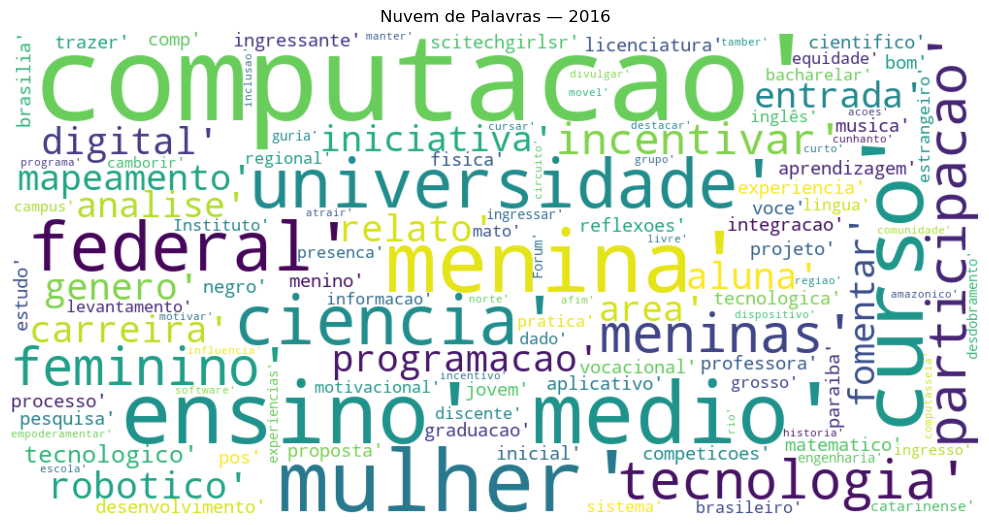

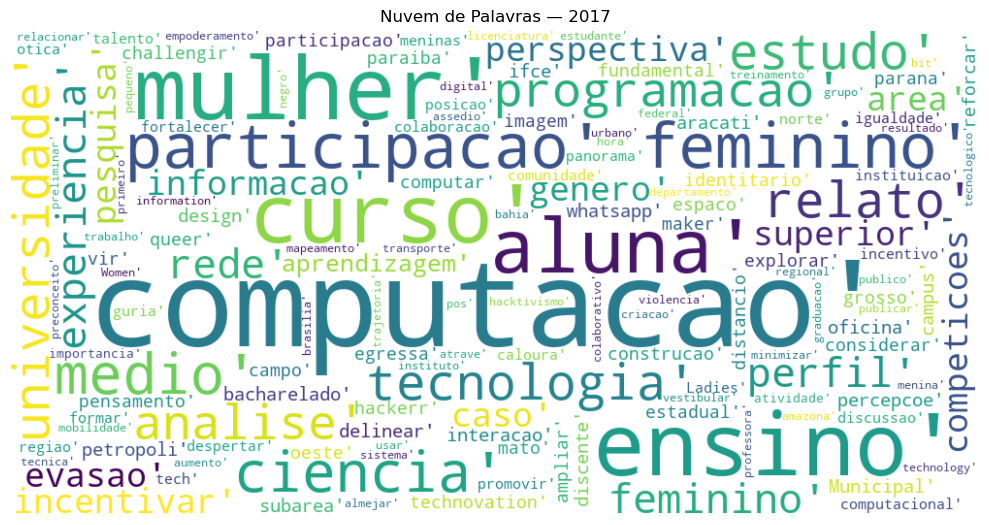

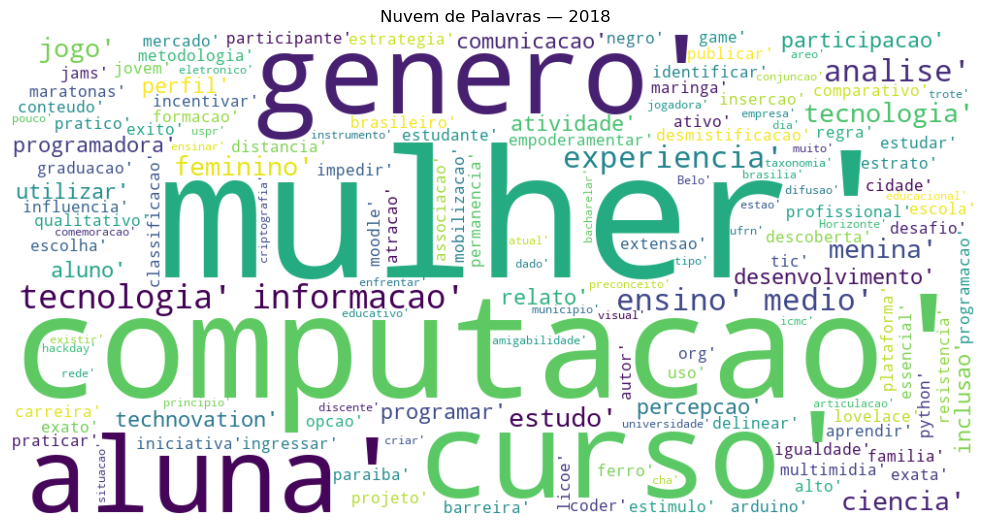

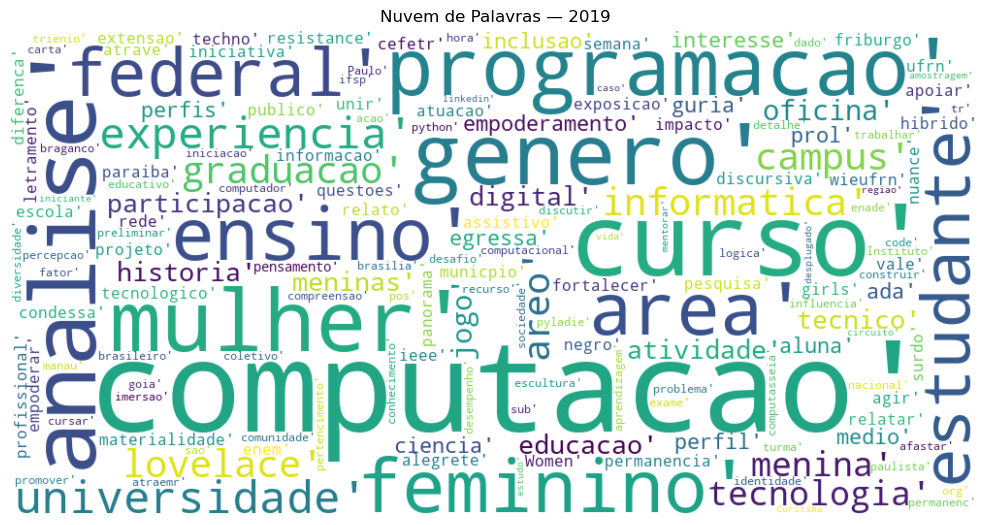

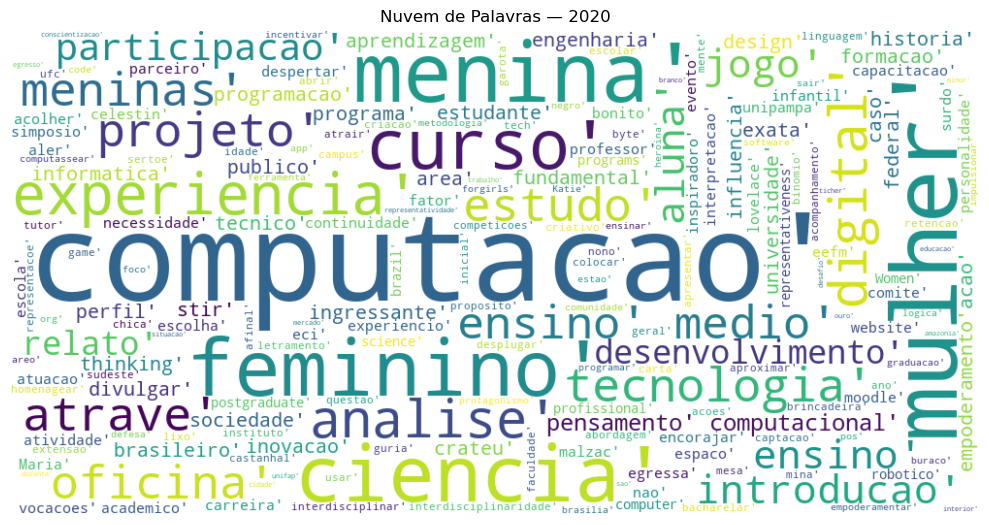

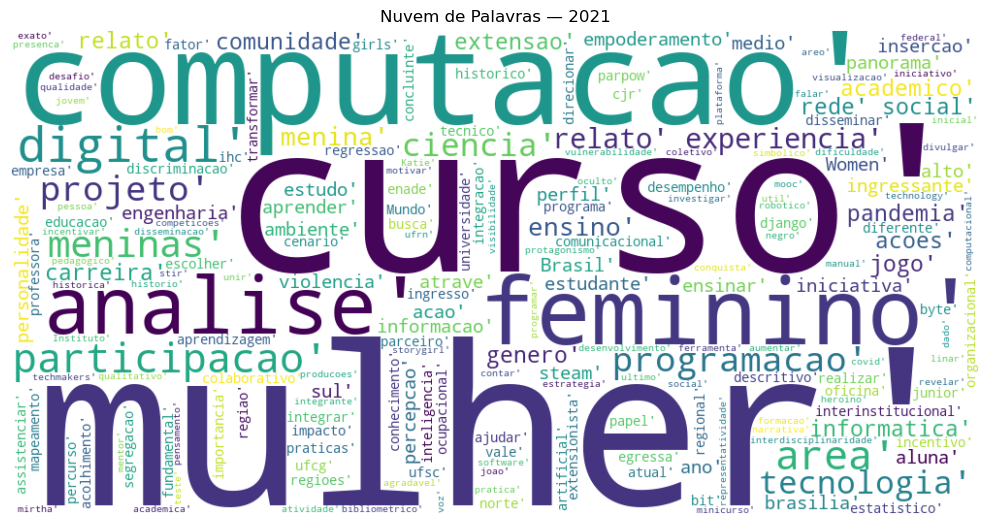

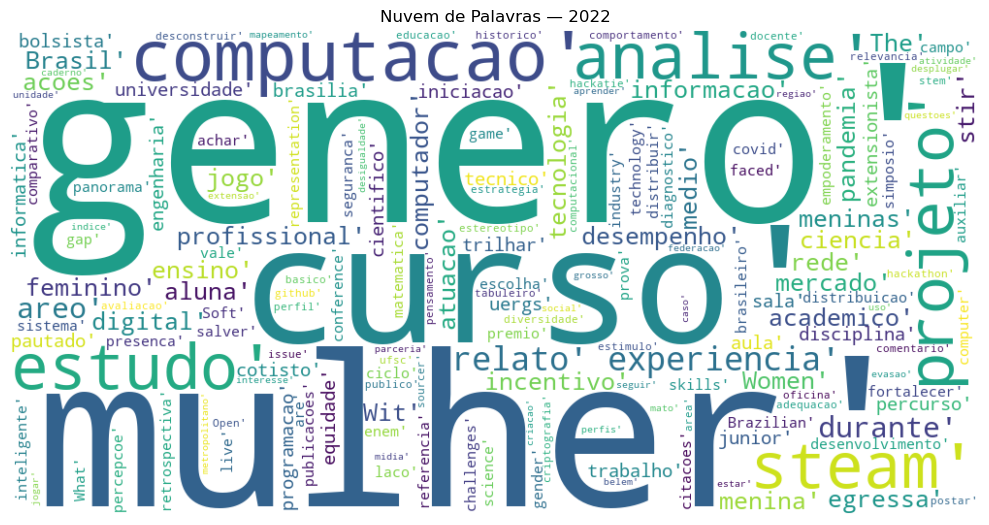

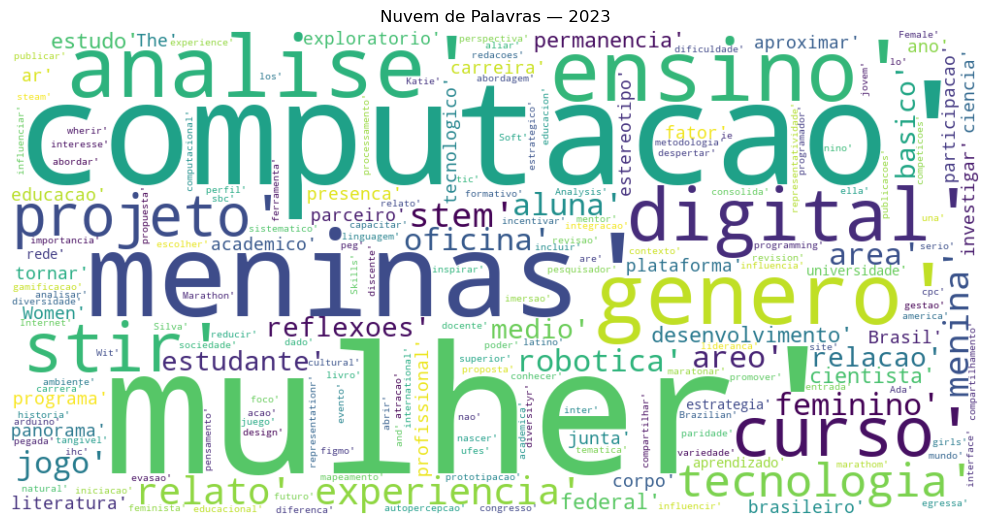

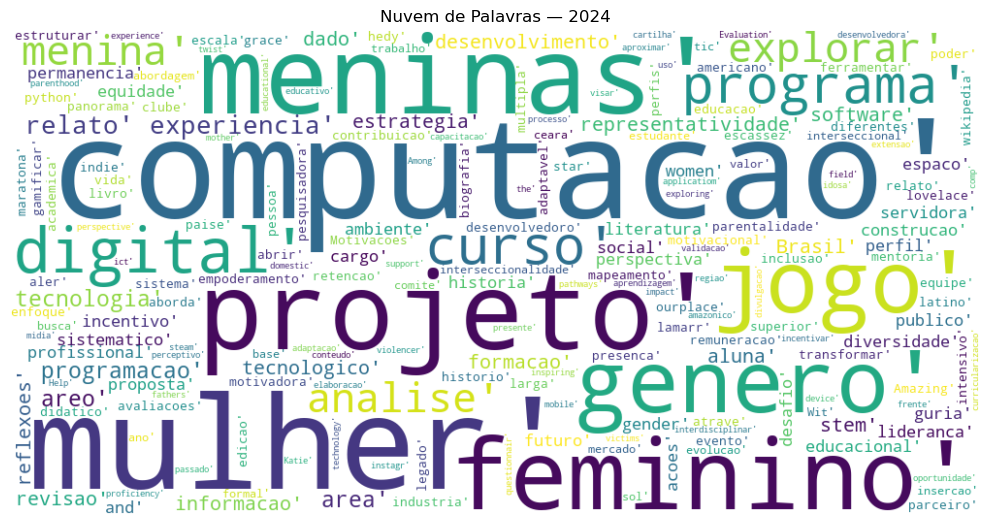

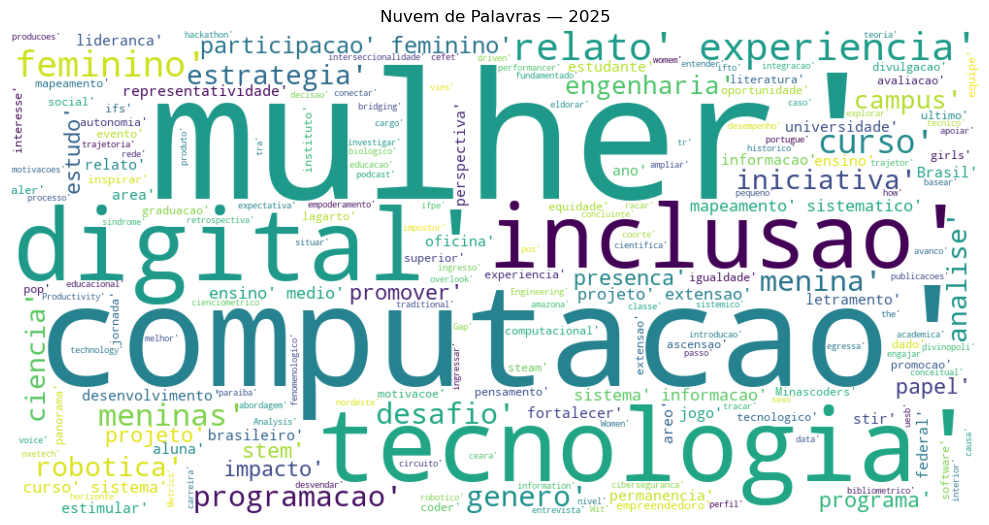

In [78]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

for _, row in titulos_por_ano.iterrows():
    ano = row['ano']
    
    #junta todas as listas de palavras daquele ano
    palavras = " ".join([" ".join(tokens) if isinstance(tokens, list) else str(tokens)
                         for tokens in row['titulo_pre_processado']])
    
    wordcloud = WordCloud(
        width=1000,
        height=500,
        background_color='white',
        colormap='viridis'
    ).generate(palavras)

    plt.figure(figsize=(10,8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Nuvem de Palavras — {ano}', fontsize=12)
    plt.tight_layout()
    # plt.savefig(f'nuvem_palavras_{ano}.png', dpi=300)
    plt.show()

In [ ]:
#Importação de Bibliotecas
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#Montando o Pipeline
vectorizer = TfidfVectorizer()

#Definição da lista de corpus agrupados
list_corpus = [corpus_pre_pandemia, corpus_pandemia, corpus_pos_pandemia]
#Definição dos títulos da nuvem de palavra gerada
title_corpus = ['Pré-Pandemia (2013 a 2019)', 'Pandemia (2020 a 2021)', 'Flexibilização (2022 a 2023)']

#Criar uma figura com três subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for i, (corpus, titulo) in enumerate(zip(list_corpus, title_corpus)):

    #Ajusta o vetorizador ao corpus e transforma os documentos em uma matriz TF-IDF
    tfidf_matrix = vectorizer.fit_transform(corpus)
    
    #Obtem os termos
    terms = vectorizer.get_feature_names_out()

    # Obter os valores TF-IDF para cada termo
    tfidf_values = tfidf_matrix.toarray()
    
    # Calcular a média dos valores TF-IDF para cada termo
    media_tfidf = np.mean(tfidf_values, axis=0)
    
    # Criar um dicionário com os termos e suas médias TF-IDF correspondentes
    tfidf_dict = dict(zip(terms, media_tfidf))
    
    # Ordenar o dicionário pelo valor da média dos scores TF-IDF em ordem decrescente
    tfidf_dict_sorted = dict(sorted(tfidf_dict.items(), key=lambda item: item[1], reverse=True))
    
    # Obter as 5 principais palavras com as maiores médias de TF-IDF
    top_terms = dict(list(tfidf_dict_sorted.items())[:50])

    #Cria uma nuvem de palavras com os scores TF-IDF
    wordcloud = WordCloud(width=1000, height=900, background_color='white',
                          contour_width = 3, contour_color = 'gray').generate_from_frequencies(top_terms)

    #Plota a nuvem de palavras no subplot correspondente
    axs[i].imshow(wordcloud, interpolation="bilinear")
    axs[i].set_title(titulo)
    axs[i].axis('off')
    # wordcloud.to_file(f"Word-Cloud-{titulo}.png")

#Configura o layout da figura
plt.tight_layout()

#Salva a figura
plt.savefig("Word-Cloud-50-Palavras-TF-IDF.png")

#Mostra a figura
plt.show()

In [ ]:
# =========================
# 5. Análise por categoria ao longo do tempo
# =========================
categoria_ano = df.groupby(["ano", "categoria"]).size().reset_index(name="qtd")

plt.figure(figsize=(12,6))
sns.lineplot(data=categoria_ano, x="ano", y="qtd", hue="categoria", marker="o")
plt.title("Evolução das categorias ao longo dos anos")
plt.tight_layout()
plt.show()

# =========================
# 6. Vetorização
# =========================
vectorizer = CountVectorizer(max_df=0.9, min_df=5)
X_counts = vectorizer.fit_transform(df["texto_completo"])

# =========================
# 7. LDA (Modelagem de Tópicos)
# =========================
n_topics = 5
lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda.fit(X_counts)

def mostrar_top_palavras(modelo, palavras, n_top=10):
    for i, topic in enumerate(modelo.components_):
        top_palavras = [palavras[i] for i in topic.argsort()[:-n_top - 1:-1]]
        print(f"Tópico {i+1}: {' | '.join(top_palavras)}")

print("\nTópicos identificados:")
mostrar_top_palavras(lda, vectorizer.get_feature_names_out())

# =========================
# 8. Distribuição de tópicos por artigo
# =========================
topic_distribution = lda.transform(X_counts)
df_topics = pd.DataFrame(topic_distribution, columns=[f"topico_{i+1}" for i in range(n_topics)])

df = pd.concat([df, df_topics], axis=1)

# =========================
# 9. Evolução dos TÓPICOS ao longo do tempo
# =========================
df_melt = df.melt(id_vars=["ano"], 
                  value_vars=[f"topico_{i+1}" for i in range(n_topics)],
                  var_name="topico", value_name="probabilidade")

topicos_ano = df_melt.groupby(["ano", "topico"])["probabilidade"].mean().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=topicos_ano, x="an_